# Plotting in Python

 Python does not have built in plotting capabilities, but there is a plethora of useful packages specialized to all kinds of plots. Here is a very incomplete list of my favorites:

- [Matplotlib](http://matplotlib.org/gallery.html)
  
  Matplotlib is the standard when it comes to plotting in Python. It is very useful for visualization for publications and can also be included in applications.
  ![cation](http://matplotlib.org/_images/fill_demo_features.png)
- [Bokeh](http://bokeh.pydata.org/en/latest/)

  Bokeh is useful to create beautiful interactive plots.
  ![bokeh](http://bokeh.pydata.org/en/latest/_images/stocks_t.png)
- [Plotly](https://plot.ly/python/)

  Similar to Bokeh, but more flexible. Plotly has api to other languages and a nice webinterface to style plots.
  ![plotly](http://images.plot.ly/plotly-documentation/thumbnail/wind-rose.jpg)
- [Mayavi](http://code.enthought.com/projects/mayavi/)

  Not really a plotting tool, but a specialized package for 3D data visualization.
  ![mayavi](http://code.enthought.com/img/mayavi-samp.png)


# What we will do

We will work primarily in `matplotlib` to cover the basics of what you will need for the projects and scientific plotting in general.

Matplotlib, as the name suggests, has strong similarities to Matlab and learning it makes it easy to plot in both languages. The `pyplot` module makes python work like matlab in many aspects.

To use matplotlib we need to do the following setup:

In [1]:
%matplotlib inline                  
import numpy as np                  # we will need numpy
import matplotlib.pyplot as plt     # and this is for plotting

Line `1` lets matplotlib output images directly in the notebook. If you just use `%matplotlib` the output is opened in a new window.

And now we can plot:

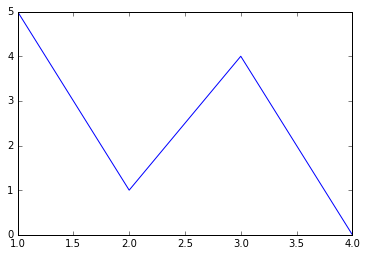

In [2]:
xv=[1,2,3,4]
yv=[5,1,4,0]
plt.plot(xv,yv)

It really is that easy!

# Understanding our plot

It is important to note that in the code above we imported `matplotlib.pyplot`. Pyplot is the part of matplotlib (MPL) we will use mostly. It is a collection of functions that can be used for the easy creation of plots. Luckily the inner workings of MPL are mostly hidden from us users.se commands create plots which consist of a. 

To really work with MPL (or any other plotting library) though, it is important to understand how plots are build up.

Plots in MPL have the following components:
- *figures*:
  A canvas to draw on
    - *axis*:
      Coordinate systems to put data in
        - *ticks*:
          labels and dimensions of the axis
  

  
MPL also uses the concept of *current plot*. Whenever you issue a `plot` command, it is drawn on your current figure if there is one, otherwise it opens a new plot.

Plots are created by `plot` commands but not displayed directly, usually you need to use the `plt.show()` command to show the figure on screen.

```{python}
plt.plot(x,y)
plt.show()
```

In this notebook we do not need to do this, because Jupyter takes care of that if we use `%matplotlib inline` command.

## Styling our plot

We can modify our plot after we created it using the `setp` function:

[None]

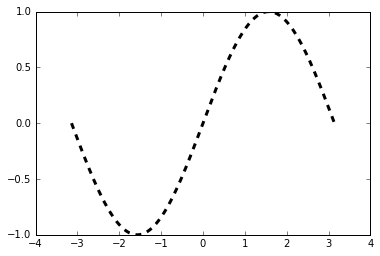

In [3]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.sin(x)
myplot = plt.plot(x,y,'k--')
plt.setp(myplot,linewidth=3.0)

Calling `plt.setp(myplot)` shows us all the available arguments:

In [4]:
plt.setp(myplot)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

### Styles

The defaults of MPL are not the most beautiful out there, so luckily we can set better defaults using styles:

In [5]:
print(plt.style.available)
plt.style.use('ggplot')

['seaborn-colorblind', 'seaborn-white', 'seaborn-paper', 'seaborn-ticks', 'seaborn-muted', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-bright', 'bmh', 'seaborn-notebook', 'seaborn-dark', 'ggplot', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-darkgrid', 'grayscale', 'classic', 'seaborn-talk', 'fivethirtyeight', 'seaborn-poster', 'dark_background']


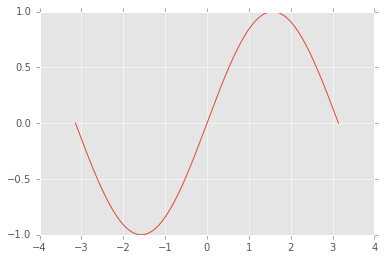

In [6]:
plt.plot(x,y)

## Legends

Legends can be added to get an overview of different plot components.
Let's create a new figure to draw on:

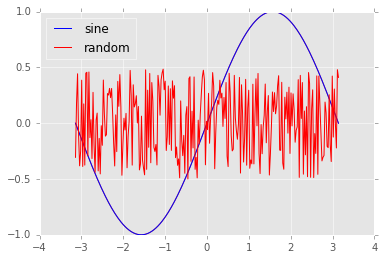

In [7]:
fig = plt.figure()
ax = plt.axes()
random = np.random.random(x.shape)-.5
ax.plot(x,y)
ax.plot(x, y, color="blue", linestyle="-", label="sine")
ax.plot(x, random, color="red", linestyle="-", label="random")
ax.legend(loc='upper left')

## Labels and Titles

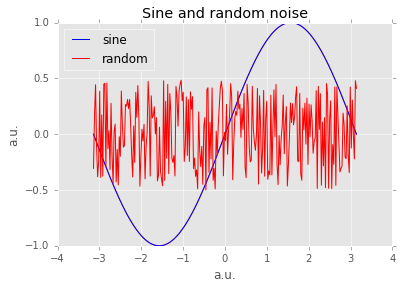

In [8]:
ax.set_xlabel("a.u.")
ax.set_ylabel("a.u.")
ax.set_title("Sine and random noise")
fig

## Ticks

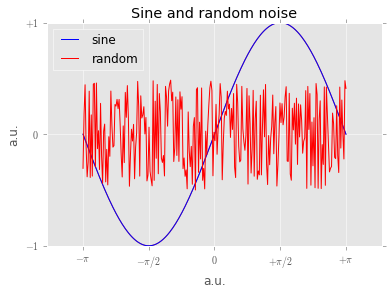

In [9]:
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_yticks([-1, 0, +1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])
fig

## Saving our work

You can save each plot in different formats:

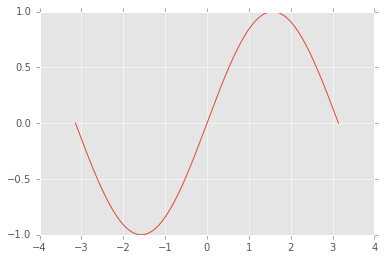

In [10]:
plt.plot(x,y)
plt.savefig('foo.png', dpi=600, format='png',orientation='landscape')

If you want to save a figure that is not your current figure:

In [11]:
fig.savefig("sine.png")

![sf](sine.png)

## Axes

Axes are the areas on you figure where your actual data lives. You can put number of axes on a figure and fill them with different data. 

Let's plot the eye of sauron:

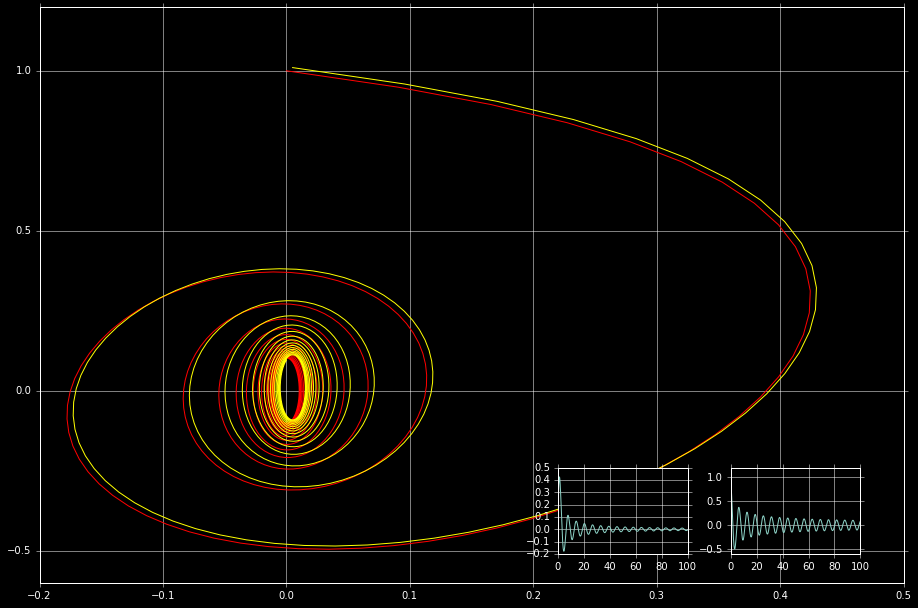

In [12]:
plt.style.use("dark_background")
t = np.linspace(0,100,1000)
s = np.sin(t)/(t+1)
c = np.cos(t)/np.sqrt((t+1))

ax1 = plt.axes([.1,.1,2,2])
ax2 = plt.axes([1.3,.2,.3,.3])
ax3 = plt.axes([1.7,.2,.3,.3])
ax2.plot(t,s)
ax3.plot(t,c)
ax1.plot(s,c, 'red')
ax1.plot(s+0.005,c+0.01, 'yellow')

Ok, pretty close.

![](https://images.duckduckgo.com/iu/?u=http%3A%2F%2Fvetoblabla.files.wordpress.com%2F2011%2F07%2Feye-of-sauron-pic.jpg&f=1)

## Subplots

The `subplot` command creates new *axis* in a regular grid that can be easily accessed. Using the subplot command we can plot different data on each of the created axis.

Calling the subplot command with a different 3rd argument can be seen as moving the cursor to a different location. Each plot directive after the `subplot` call will be done on the according subplot/axes.

![](http://www.labri.fr/perso/nrougier/teaching/matplotlib/figures/subplot-grid.png)

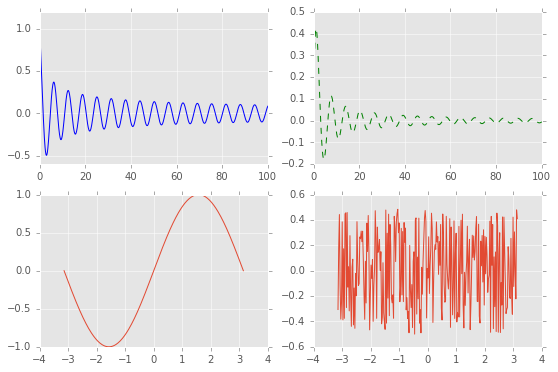

In [13]:
plt.style.use("ggplot")
plt.figure(figsize=(9,6))
plt.subplot(2,2,1)
plt.plot(t, c, color="blue", linewidth=1.0, linestyle="-")
plt.subplot(2,2,2)
# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(t, s, color="green", linewidth=1.0, linestyle="--")
plt.subplot(2,2,3)
plt.plot(x,y)
plt.subplot(2,2,4)
plt.plot(x,random)

Another example:

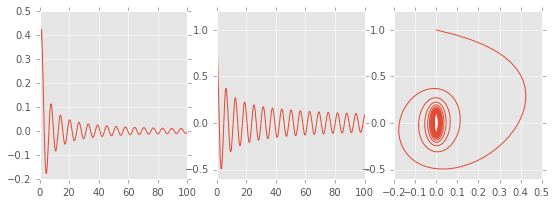

In [14]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.plot(t,s)
plt.subplot(1,3,2)
plt.plot(t,c)
plt.subplot(1,3,3)
plt.plot(s,c)

### Shared axis

In the above example it would make sense to make at least the y-axis shared to keep scaling and save space. For this we need to assign axis manually using the `subplots` command:

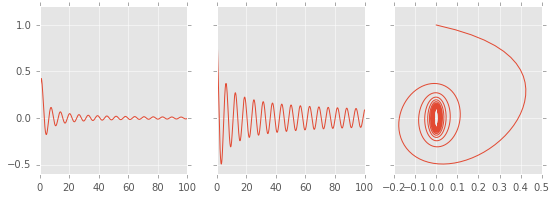

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                  sharey=True, 
                                  sharex=False, 
                                  figsize=(9,3))
ax1.plot(t,s)
ax2.plot(t,c)
ax3.plot(s,c)

## Animation

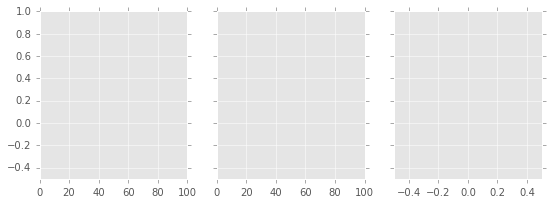

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                      sharey=True, 
                      sharex=False, 
                      figsize=(9,3))

p1, = ax1.plot([],[])
p2, = ax2.plot([],[])
p3, = ax3.plot([],[])
t = np.linspace(0,100,2000)
x = np.sin(t)/(t+1)
y = np.cos(t)/np.sqrt(t+1)
ax1.set_ylim((-0.5,1))
ax1.set_xlim((0,100))
ax2.set_xlim((0,100))
ax3.set_xlim((-.5,.5))

def animate(i):
    p1.set_data(t[0:i*10],x[0:i*10])
    p2.set_data(t[0:i*10],y[0:i*10])
    p3.set_data(x[0:i*10],y[0:i*10])
    return p1,p2,p3

# Init only required for blitting to give a clean slate.
def init():
    p1.set_data(np.ma.array(t, mask=True),np.ma.array(x, mask=True))
    p2.set_data(np.ma.array(t, mask=True),np.ma.array(y, mask=True))
    p3.set_data(np.ma.array(x, mask=True),np.ma.array(y, mask=True))
    return p1,p2,p3

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=10, blit=True)

In [17]:
plt.style.use("classic")
ani.save('ani.gif', writer="imagemagick", fps=30, dpi=50)

![animation](ani.gif)

## Matplotlib resources:

To get inspiration and further help look at the MPL website. Here are a few things you might want to have a look at before doing the exercise:

- In this notebook, whenever you are in a code block and press `Shift+Tab` you will get a popup that tries to help you, repeatedly press and it becomes even more helpful
- [Gallery](http://matplotlib.org/gallery.html) of beautiful plots
- [Examples](http://matplotlib.org/examples/index.html) for (almost) everything you can to with MPL
- [Pyplot](http://matplotlib.org/api/pyplot_summary.html) documentation that tells you how to use the commands available

# Exercises

# Exercise 1

#### a)

First you will plot a real time series dataset. In the same folder as this notebook there is a `.csv` file containing the expression of cell cycle dependent yeast genes. Your task is to visualize these.

We prepared a snippet that handles the reading of the csv file and gives you three variables:
- `data`: contains the expression changes over time
- `times`: the measurement times
- `genes`: names of the included genes

In [18]:
from numpy import genfromtxt
import csv
data = genfromtxt('genes.csv', delimiter=',', skip_header=1)[:,1:]
with open('genes.csv') as f:
    times = csv.reader(f).__next__()[1:]
    times = [int(t) for t in times]
    genes = [x[0] for x in csv.reader(f)]

#### Plot all the time series into one plot

To include the correct x-axis you might need to create a matrix of the same dimensions as the data. Use your *numpy* skills in repeating and reshaping for this!

#### Add labels and a title

Use the plot you made above and add some descriptions.

#### Add a legend

Here you will need to do each plot seperately in a for loop to include labels.

#### b)

Plot the mean and standard deviation at each time point. To add errorbars look at [this](http://matplotlib.org/examples/pylab_examples/errorbar_limits.html) example.

## Exercise 2

Plot the corellation between different time points as scatter plots.

## Exercise 3

Look at the examples in matplotlib. Can you do a histogram of all measurements?

## Exercise 4

Put the last 2 plots into one figure using subplots.

## Further material

http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html#other-types-of-plots-examples-and-exercises

## Bonus

Extend the above animation with a dot at the tip of the line.